## 질병과 날씨와의 관계
### 1. 데이터 로딩

In [695]:
import warnings
warnings.filterwarnings('ignore')

In [696]:
import pymysql
import pandas as pd

conn = pymysql.connect(host='multi-bigdata.cljkqcsbb9ok.ap-northeast-2.rds.amazonaws.com',port=3306,user='edu02',passwd='edu02', db='edudb01', cursorclass=pymysql.cursors.DictCursor)
try:
    cur = conn.cursor()
    sql = '''
        SELECT *
        FROM Diseases
        WHERE 1 = 1
        -- AND DATE BETWEEN '2017-11-01' AND '2020-10-31'
        AND DATE BETWEEN '2019-01-01' AND '2019-12-31'
    '''
    cur.execute(sql)
    result_Diseases = cur.fetchall()
finally:
    conn.close()
print('마리아에서 불러온 행 수 :', len(result_naverShopping))

마리아에서 불러온 행 수 : 7672


In [697]:
conn = pymysql.connect(host='multi-bigdata.cljkqcsbb9ok.ap-northeast-2.rds.amazonaws.com',port=3306,user='edu02',passwd='edu02', db='edudb01', cursorclass=pymysql.cursors.DictCursor)
try:
    cur = conn.cursor()
    sql = '''
        SELECT *
        FROM ASOS_Weather_D
        WHERE 1 = 1
        -- AND DATE BETWEEN '2017-11-01' AND '2020-10-31'
        AND DATE BETWEEN '2019-01-01' AND '2019-12-31'
    '''
    cur.execute(sql)
    result_weather = cur.fetchall()
finally:
    conn.close()
print('마리아에서 불러온 행 수 :', len(result_weather))

마리아에서 불러온 행 수 : 6055


In [698]:
citypop = pd.read_csv('data/시_인구및인구밀도.csv', header=0)

citypop['Year'] = pd.to_datetime(citypop['dt']).dt.year
citypop.head()


,city,dt,pop,denpop,Year
0,서울특별시,2017-01-01,9766,16136,2017
1,부산광역시,2017-01-01,3424,4447,2017
2,대구광역시,2017-01-01,2458,2782,2017
3,인천광역시,2017-01-01,2924,2750,2017
4,광주광역시,2017-01-01,1495,2984,2017


In [699]:
# 기간 : 20191101 ~ 20201031
dtdiseases = pd.DataFrame(result_Diseases)
dtweather = pd.DataFrame(result_weather)
dtdiseases.rename(columns = {'Date' : 'dt'}, inplace = True)
dtweather.rename(columns = {'date' : 'dt'}, inplace = True)
display(dtdiseases.head(2))
display(dtweather.head(2))
display(dtdiseases.isnull().sum())
display(dtweather.isnull().sum())

,dt,Diseases,Seoul,Busan,Daegu,Incheon,Gwangju,Daejeon,Ulsan,Gyeonggi,Gangwon,Chungbuk,Chungnam,Jeonbuk,Jeonnam,Gyeongbuk,Gyeongnam,Jeju,Sejong
0,2019-01-01,A형간염,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2019-01-01,C형간염,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


,city,dt,temp_avg,temp_min,temp_max,amount_of_rain,wind_vel_max,wind_vel_avg,dewpoint_avg,r_humidity,vapor_pressure_avg,station_pressure_avg,sealevel_pressure_avg,daylight_hour
0,강원도,2019-01-01,-5.4,-16.5,3.5,0.0,9.3,1.9,-15.9,48.6,1.8,1004.3,1031.8,6.6
1,강원도,2019-01-02,-5.6,-16.6,6.3,0.0,6.2,1.5,-17.7,44.6,1.6,1005.3,1032.9,8.2


dt           0
Diseases     0
Seoul        0
Busan        0
Daegu        0
Incheon      0
Gwangju      0
Daejeon      0
Ulsan        0
Gyeonggi     0
Gangwon      0
Chungbuk     0
Chungnam     0
Jeonbuk      0
Jeonnam      0
Gyeongbuk    0
Gyeongnam    0
Jeju         0
Sejong       0
dtype: int64

city                     0
dt                       0
temp_avg                 0
temp_min                 0
temp_max                 0
amount_of_rain           0
wind_vel_max             0
wind_vel_avg             0
dewpoint_avg             0
r_humidity               0
vapor_pressure_avg       0
station_pressure_avg     0
sealevel_pressure_avg    0
daylight_hour            0
dtype: int64

In [700]:
getCity = dtweather.groupby('city').sum().reset_index()
getCity.city.tolist()

dtdiseases.columns = [ 'dt', '질병명', '서울특별시',  '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시', '경기도', \
                       '강원도',  '충청북도',  '충청남도',  '전라북도', '전라남도', '경상북도', '경상남도', '제주도', '세종특별자치시']

display(dtdiseases.head(7))


,dt,질병명,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주도,세종특별자치시
0,2019-01-01,A형간염,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2019-01-01,C형간염,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2019-01-01,성홍열,3,0,0,0,1,2,0,2,0,0,1,0,1,0,0,0,0
3,2019-01-01,수두,13,6,8,4,2,2,3,46,1,1,6,5,13,7,22,10,6
4,2019-01-01,유행성이하선염(볼거리),0,1,0,0,0,0,3,5,0,3,0,3,0,0,1,0,0
5,2019-01-01,쯔쯔가무시,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,2019-01-01,카바페넴내성장내세균속균종(CRE)감염증,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [701]:
display(dtdiseases.columns.to_list()[2:])
df = pd.DataFrame()
for ct in dtdiseases.columns.to_list()[2:] :
    print(ct)
    xdiseases = dtdiseases.pivot(index=['dt'], columns='질병명', values=ct).reset_index()
    xdiseases['city']  = ct
    df = df.append(xdiseases, ignore_index=True)
xydiseases = df

['서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '경기도',
 '강원도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주도',
 '세종특별자치시']

서울특별시
부산광역시
대구광역시
인천광역시
광주광역시
대전광역시
울산광역시
경기도
강원도
충청북도
충청남도
전라북도
전라남도
경상북도
경상남도
제주도
세종특별자치시


In [702]:
display(xydiseases.head(2))
display(xydiseases.where(xydiseases.city == '서울특별시').isnull().sum())
# xydiseases.to_csv('./data/tmp.csv')

질병명,dt,A형간염,C형간염,성홍열,수두,유행성이하선염(볼거리),쯔쯔가무시,카바페넴내성장내세균속균종(CRE)감염증,city
0,2019-01-01,0,0,3,13,0,0,0,서울특별시
1,2019-01-02,4,6,8,88,5,1,19,서울특별시


질병명
dt                       5840
A형간염                     5840
C형간염                     5840
성홍열                      5840
수두                       5840
유행성이하선염(볼거리)             5840
쯔쯔가무시                    5840
카바페넴내성장내세균속균종(CRE)감염증    5840
city                     5840
dtype: int64

In [703]:
# display(xydiseases.groupby('city').count())
# display(dtweather.groupby('city').count())
# display(dtweather.where(dtweather['city'] =='세종특별자치시').groupby('dt').count())

In [704]:
weatherDis = pd.merge(dtweather, xydiseases, left_on=["dt", "city"], right_on=["dt", "city"], how="inner")
# weatherDis.iloc[:, [13,14,15,16,17,18,19]] = weatherDis.iloc[:, [13,14,15,16,17,18,19]].astype('float')
weatherDis['Year'] = pd.to_datetime(weatherDis['dt']).dt.year
display(weatherDis.info())
display(weatherDis.isnull().sum())
display(weatherDis.head(2))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6055 entries, 0 to 6054
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   city                   6055 non-null   object 
 1   dt                     6055 non-null   object 
 2   temp_avg               6055 non-null   float64
 3   temp_min               6055 non-null   float64
 4   temp_max               6055 non-null   float64
 5   amount_of_rain         6055 non-null   float64
 6   wind_vel_max           6055 non-null   float64
 7   wind_vel_avg           6055 non-null   float64
 8   dewpoint_avg           6055 non-null   float64
 9   r_humidity             6055 non-null   float64
 10  vapor_pressure_avg     6055 non-null   float64
 11  station_pressure_avg   6055 non-null   float64
 12  sealevel_pressure_avg  6055 non-null   float64
 13  daylight_hour          6055 non-null   float64
 14  A형간염                   6055 non-null   int64  
 15  C형간염

None

city                     0
dt                       0
temp_avg                 0
temp_min                 0
temp_max                 0
amount_of_rain           0
wind_vel_max             0
wind_vel_avg             0
dewpoint_avg             0
r_humidity               0
vapor_pressure_avg       0
station_pressure_avg     0
sealevel_pressure_avg    0
daylight_hour            0
A형간염                     0
C형간염                     0
성홍열                      0
수두                       0
유행성이하선염(볼거리)             0
쯔쯔가무시                    0
카바페넴내성장내세균속균종(CRE)감염증    0
Year                     0
dtype: int64

,city,dt,temp_avg,temp_min,temp_max,amount_of_rain,wind_vel_max,wind_vel_avg,dewpoint_avg,r_humidity,...,sealevel_pressure_avg,daylight_hour,A형간염,C형간염,성홍열,수두,유행성이하선염(볼거리),쯔쯔가무시,카바페넴내성장내세균속균종(CRE)감염증,Year
0,강원도,2019-01-01,-5.4,-16.5,3.5,0.0,9.3,1.9,-15.9,48.6,...,1031.8,6.6,0,0,0,1,0,0,0,2019
1,강원도,2019-01-02,-5.6,-16.6,6.3,0.0,6.2,1.5,-17.7,44.6,...,1032.9,8.2,4,0,0,13,2,0,3,2019


In [705]:
weatherDis = pd.merge(weatherDis, citypop, left_on=["Year", "city"], right_on=["Year", "city"], how="inner")
display(weatherDis.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6055 entries, 0 to 6054
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   city                   6055 non-null   object 
 1   dt_x                   6055 non-null   object 
 2   temp_avg               6055 non-null   float64
 3   temp_min               6055 non-null   float64
 4   temp_max               6055 non-null   float64
 5   amount_of_rain         6055 non-null   float64
 6   wind_vel_max           6055 non-null   float64
 7   wind_vel_avg           6055 non-null   float64
 8   dewpoint_avg           6055 non-null   float64
 9   r_humidity             6055 non-null   float64
 10  vapor_pressure_avg     6055 non-null   float64
 11  station_pressure_avg   6055 non-null   float64
 12  sealevel_pressure_avg  6055 non-null   float64
 13  daylight_hour          6055 non-null   float64
 14  A형간염                   6055 non-null   int64  
 15  C형간염

None

In [760]:
# display(weatherDis.columns.to_list())
disList = ['A형간염', 'C형간염', '성홍열', '수두', '유행성이하선염(볼거리)', '쯔쯔가무시', '카바페넴내성장내세균속균종(CRE)감염증']
for d in disList :
    weatherDis['pop_' + d]  = weatherDis[d] / weatherDis['pop']

weatherDis.drop(['pop_A형간염', 'pop_C형간염', 'pop_성홍열', 'pop_수두', 'pop_유행성이하선염(볼거리)', 'pop_쯔쯔가무시', 'pop_카바페넴내성장내세균속균종(CRE)감염증'], axis=1, inplace=True)    

display(weatherDis)

,city,dt_x,temp_avg,temp_min,temp_max,amount_of_rain,wind_vel_max,wind_vel_avg,dewpoint_avg,r_humidity,...,C형간염,성홍열,수두,유행성이하선염(볼거리),쯔쯔가무시,카바페넴내성장내세균속균종(CRE)감염증,Year,dt_y,pop,denpop
0,강원도,2019-01-01,-5.4,-16.5,3.5,0.0,9.3,1.9,-15.9,48.6,...,0,0,1,0,0,0,2019,2019-01-01,1517,90
1,강원도,2019-01-02,-5.6,-16.6,6.3,0.0,6.2,1.5,-17.7,44.6,...,0,0,13,2,0,3,2019,2019-01-01,1517,90
2,강원도,2019-01-03,-4.8,-16.8,6.8,0.0,6.0,1.2,-17.2,43.7,...,0,0,8,1,0,3,2019,2019-01-01,1517,90
3,강원도,2019-01-04,-2.0,-14.1,8.9,0.0,9.1,1.7,-13.1,47.8,...,3,1,3,0,0,3,2019,2019-01-01,1517,90
4,강원도,2019-01-05,-2.5,-13.5,5.1,0.0,6.5,1.5,-12.6,50.6,...,1,0,7,0,0,0,2019,2019-01-01,1517,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6050,충청북도,2019-12-27,-2.4,-11.3,4.2,0.0,7.3,1.8,-8.8,63.4,...,0,0,11,2,0,0,2019,2019-01-01,1626,219
6051,충청북도,2019-12-28,-2.5,-11.7,7.3,0.0,1.9,0.5,-8.0,68.9,...,1,0,7,1,0,0,2019,2019-01-01,1626,219
6052,충청북도,2019-12-29,0.2,-8.0,5.2,7.2,4.0,0.7,-3.5,77.9,...,0,0,4,2,0,0,2019,2019-01-01,1626,219
6053,충청북도,2019-12-30,2.8,-3.9,7.4,1.5,8.7,1.6,0.5,86.0,...,3,1,23,3,2,1,2019,2019-01-01,1626,219


In [707]:
# weatherDis.to_csv('./data/temp.csv')

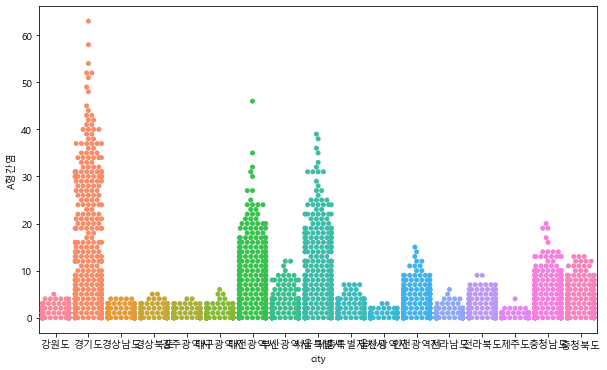

In [708]:
fig, ax = plt.subplots(figsize=(10,6))
sns.swarmplot(x="city",           #x축 변수
              y="A형간염",        #y축 변수
              data=weatherDis)
plt.show()

In [761]:
tmp = weatherDis[weatherDis['city'] == '서울특별시']
tmp_s = weatherDis[weatherDis['city'] == '서울특별시']
# corrweatherDis = tmp.corr()
# corrweatherDis.to_csv("./data/corrSheet_weatherDis_서울특별시.csv")


In [762]:
from sklearn import preprocessing
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [763]:
tmp_ss = tmp_s[['A형간염', 'C형간염', '성홍열', '수두', '유행성이하선염(볼거리)', '쯔쯔가무시', '카바페넴내성장내세균속균종(CRE)감염증']]
tmp_s = tmp_s.drop(['A형간염', 'C형간염', '성홍열', '수두', '유행성이하선염(볼거리)', '쯔쯔가무시', '카바페넴내성장내세균속균종(CRE)감염증'], axis=1)
tmp_ss = normalize(tmp_ss)
display(tmp_ss.head(2))
display(tmp_s.head(2))
tmp_s = pd.merge(tmp_s, tmp_ss, left_index=True, right_index=True, how='left')

display(tmp_s.head(2))

,A형간염,C형간염,성홍열,수두,유행성이하선염(볼거리),쯔쯔가무시,카바페넴내성장내세균속균종(CRE)감염증
2920,0.000000,0.000,0.250000,0.117647,0.000000,0.000,0.00000
2921,0.102564,0.375,0.666667,1.000000,0.263158,0.125,0.44186


,city,dt_x,temp_avg,temp_min,temp_max,amount_of_rain,wind_vel_max,wind_vel_avg,dewpoint_avg,r_humidity,vapor_pressure_avg,station_pressure_avg,sealevel_pressure_avg,daylight_hour,Year,dt_y,pop,denpop
2920,서울특별시,2019-01-01,-5.0,-8.2,-0.6,0.0,4.3,2.1,-14.1,49.5,2.1,1022.6,1033.8,7.5,2019,2019-01-01,9662,15964
2921,서울특별시,2019-01-02,-4.9,-8.8,0.2,0.0,3.6,1.7,-16.1,42.8,1.7,1023.4,1034.6,8.7,2019,2019-01-01,9662,15964


,city,dt_x,temp_avg,temp_min,temp_max,amount_of_rain,wind_vel_max,wind_vel_avg,dewpoint_avg,r_humidity,...,dt_y,pop,denpop,A형간염,C형간염,성홍열,수두,유행성이하선염(볼거리),쯔쯔가무시,카바페넴내성장내세균속균종(CRE)감염증
2920,서울특별시,2019-01-01,-5.0,-8.2,-0.6,0.0,4.3,2.1,-14.1,49.5,...,2019-01-01,9662,15964,0.000000,0.000,0.250000,0.117647,0.000000,0.000,0.00000
2921,서울특별시,2019-01-02,-4.9,-8.8,0.2,0.0,3.6,1.7,-16.1,42.8,...,2019-01-01,9662,15964,0.102564,0.375,0.666667,1.000000,0.263158,0.125,0.44186


In [764]:

# corrweatherDis = weatherDis.corr()
# corrweatherDis.to_csv("./data/corrSheet_weatherDis.csv")
disList = ['A형간염', 'C형간염', '성홍열', '수두', '유행성이하선염(볼거리)', '쯔쯔가무시', '카바페넴내성장내세균속균종(CRE)감염증']


tmp_s.sort_values(by=['dt_x'], axis=0, inplace=True)


for d in disList :
    tmp_s['sft_' + d]  = tmp_s[d].shift(-14)

tmp_s.drop(['A형간염', 'C형간염', '성홍열', '수두', '유행성이하선염(볼거리)', '쯔쯔가무시', '카바페넴내성장내세균속균종(CRE)감염증'], axis=1)    

tmp_s = tmp_s.dropna(how='any',axis=0) 

display(tmp_s.head(2))
display(tmp_s.tail(2))


,city,dt_x,temp_avg,temp_min,temp_max,amount_of_rain,wind_vel_max,wind_vel_avg,dewpoint_avg,r_humidity,...,유행성이하선염(볼거리),쯔쯔가무시,카바페넴내성장내세균속균종(CRE)감염증,sft_A형간염,sft_C형간염,sft_성홍열,sft_수두,sft_유행성이하선염(볼거리),sft_쯔쯔가무시,sft_카바페넴내성장내세균속균종(CRE)감염증
2920,서울특별시,2019-01-01,-5.0,-8.2,-0.6,0.0,4.3,2.1,-14.1,49.5,...,0.000000,0.000,0.00000,0.076923,0.5625,0.583333,0.270588,0.263158,0.0,0.232558
2921,서울특별시,2019-01-02,-4.9,-8.8,0.2,0.0,3.6,1.7,-16.1,42.8,...,0.263158,0.125,0.44186,0.179487,0.1875,0.250000,0.247059,0.368421,0.0,0.255814


,city,dt_x,temp_avg,temp_min,temp_max,amount_of_rain,wind_vel_max,wind_vel_avg,dewpoint_avg,r_humidity,...,유행성이하선염(볼거리),쯔쯔가무시,카바페넴내성장내세균속균종(CRE)감염증,sft_A형간염,sft_C형간염,sft_성홍열,sft_수두,sft_유행성이하선염(볼거리),sft_쯔쯔가무시,sft_카바페넴내성장내세균속균종(CRE)감염증
3269,서울특별시,2019-12-16,7.8,2.1,12.9,0.0,3.2,1.9,0.0,58.9,...,0.473684,0.0,0.790698,0.102564,0.4375,0.166667,0.776471,0.105263,0.0,0.604651
3270,서울특별시,2019-12-17,7.7,3.2,10.2,9.8,4.5,2.3,4.5,81.4,...,0.210526,0.0,0.395349,0.025641,0.1875,0.083333,0.458824,0.263158,0.0,0.325581


In [765]:
# tmp_s.columns.to_list()


In [766]:
# tem = weatherDis
tmp_s['datetime'] = tmp_s['dt_x'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))
tmp_s = tmp_s[['datetime', 'daylight_hour', 'temp_avg', 'r_humidity', 'sft_A형간염','sft_C형간염', 'sft_성홍열', 'sft_수두', 'sft_유행성이하선염(볼거리)', 'sft_쯔쯔가무시', 'sft_카바페넴내성장내세균속균종(CRE)감염증']]
tmp_s.set_index(tmp_s['datetime'], inplace=True)
tmp_s = tmp_s.drop('datetime', 1)
tmp_s

,daylight_hour,temp_avg,r_humidity,sft_A형간염,sft_C형간염,sft_성홍열,sft_수두,sft_유행성이하선염(볼거리),sft_쯔쯔가무시,sft_카바페넴내성장내세균속균종(CRE)감염증
datetime,,,,,,,,,,
2019-01-01,7.5,-5.0,49.5,0.076923,0.5625,0.583333,0.270588,0.263158,0.0,0.232558
2019-01-02,8.7,-4.9,42.8,0.179487,0.1875,0.250000,0.247059,0.368421,0.0,0.255814
2019-01-03,8.7,-3.5,38.8,0.025641,0.2500,0.166667,0.329412,0.315789,0.0,0.372093
2019-01-04,3.9,-1.1,55.5,0.076923,0.4375,0.250000,0.388235,0.631579,0.0,0.186047
2019-01-05,8.6,-2.8,40.3,0.025641,0.0625,0.250000,0.235294,0.052632,0.0,0.023256
...,...,...,...,...,...,...,...,...,...,...
2019-12-13,3.4,2.1,53.6,0.000000,0.3750,0.083333,0.811765,0.263158,0.0,0.348837
2019-12-14,8.3,2.7,58.3,0.000000,0.0000,0.083333,0.247059,0.052632,0.0,0.069767
2019-12-15,7.3,5.3,52.5,0.000000,0.0000,0.083333,0.105882,0.052632,0.0,0.000000


In [767]:
from sklearn import preprocessing
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

a = [[100, 200], [200, 400], [150, 250]]
print(pd.DataFrame(a))

normalize(pd.DataFrame(a))

     0    1
0  100  200
1  200  400
2  150  250


,0,1
0,0.0,0.00
1,1.0,1.00
2,0.5,0.25


In [768]:
import pandas as pd
import numpy as np

weekly_df1 = tmp_s[[ 'sft_A형간염','sft_C형간염', 'sft_성홍열', 'sft_수두', 'sft_유행성이하선염(볼거리)', 'sft_쯔쯔가무시', 'sft_카바페넴내성장내세균속균종(CRE)감염증']]. \
                resample('1D').sum()
weekly_df2 = tmp_s[['daylight_hour', 'temp_avg',  'r_humidity']].resample('1D').mean()


weekly_tr = pd.merge(weekly_df1, weekly_df2, left_on=['datetime'], right_on=['datetime'], how="inner")

display(weekly_tr.count())

sft_A형간염                     351
sft_C형간염                     351
sft_성홍열                      351
sft_수두                       351
sft_유행성이하선염(볼거리)             351
sft_쯔쯔가무시                    351
sft_카바페넴내성장내세균속균종(CRE)감염증    351
daylight_hour                351
temp_avg                     351
r_humidity                   351
dtype: int64

In [769]:
import pandas as pd
import numpy as np

weekly_df1 = tmp_s[[  'sft_A형간염','sft_C형간염', 'sft_성홍열', 'sft_수두', 'sft_유행성이하선염(볼거리)', 'sft_쯔쯔가무시', 'sft_카바페넴내성장내세균속균종(CRE)감염증']]. \
                resample('W').sum()
weekly_df2 = tmp_s[['daylight_hour', 'temp_avg',  'r_humidity']].resample('W').mean()


weekly_trl = pd.merge(weekly_df1, weekly_df2, left_on=['datetime'], right_on=['datetime'], how="inner")

display(weekly_trl.count())

sft_A형간염                     51
sft_C형간염                     51
sft_성홍열                      51
sft_수두                       51
sft_유행성이하선염(볼거리)             51
sft_쯔쯔가무시                    51
sft_카바페넴내성장내세균속균종(CRE)감염증    51
daylight_hour                51
temp_avg                     51
r_humidity                   51
dtype: int64

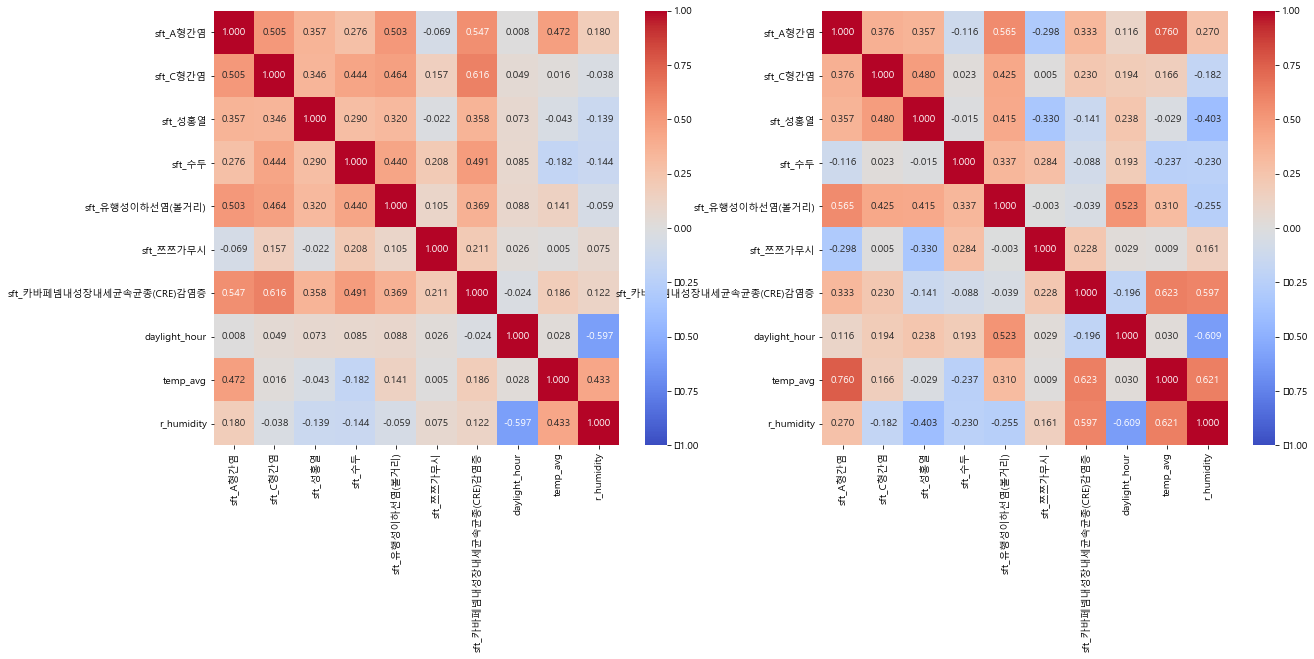

In [770]:
df_cor = weekly_tr.corr()
df_cor1 = weekly_trl.corr()

fig, axes = plt.subplots(ncols=2, figsize=(20,8))
plt.rcParams['figure.figsize']=(10,10)
sns.heatmap(df_cor,
            annot=True,
            cmap='coolwarm',
            fmt='.3f',
            vmin=-1, vmax=1,
            ax=axes[0])

sns.heatmap(df_cor1,
            annot=True,
            cmap='coolwarm',
            fmt='.3f',
            vmin=-1, vmax=1,
            ax=axes[1])
plt.show()


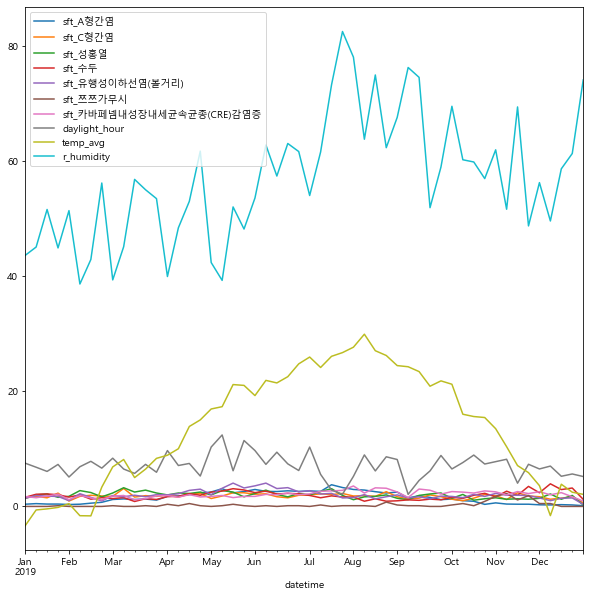

In [741]:
weekly_trl.plot()
plt.show()

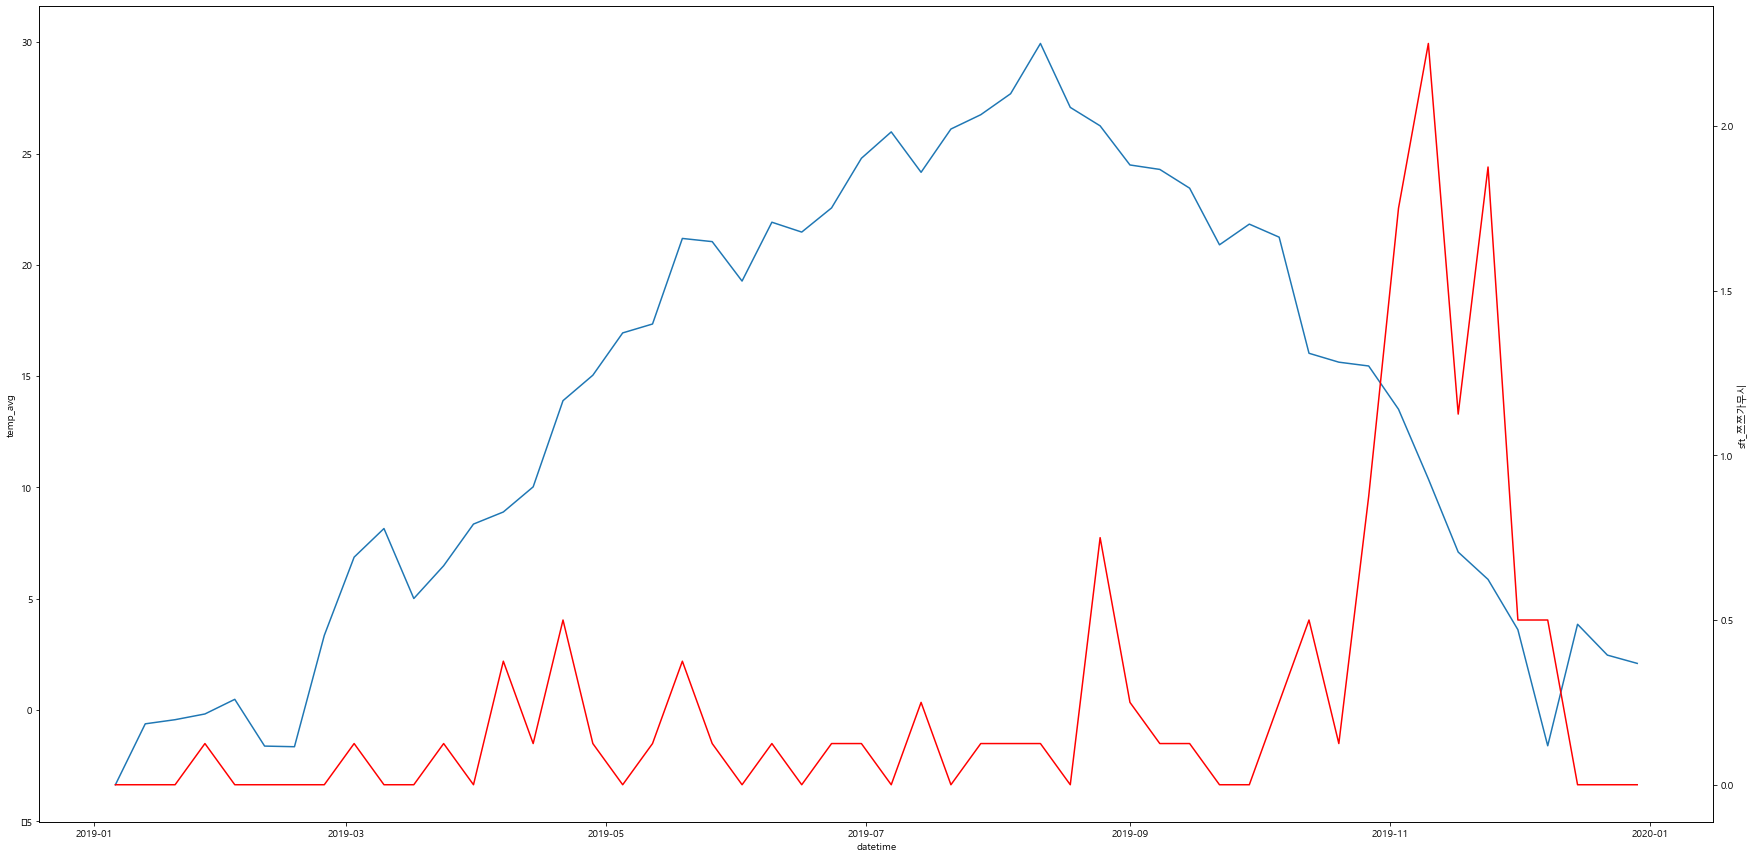

In [742]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "/usr/share/fonts/truetype/malgun.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
# print(font_name)

fig, ax = plt.subplots(figsize=(30, 15))
sns.lineplot(x='datetime', y='temp_avg', data=weekly_trl, ax=ax)
ax2 = ax.twinx()
sns.lineplot(x='datetime', y='sft_쯔쯔가무시', data=weekly_trl, ax=ax2, color='r')
plt.show()

# - 강수량과 일조량의 영향력

In [743]:
display(tmp_s.head(2))

,daylight_hour,temp_avg,r_humidity,sft_A형간염,sft_C형간염,sft_성홍열,sft_수두,sft_유행성이하선염(볼거리),sft_쯔쯔가무시,sft_카바페넴내성장내세균속균종(CRE)감염증
datetime,,,,,,,,,,
2019-01-01,7.5,-5.0,49.5,0.179487,0.3125,0.25,0.317647,0.263158,0.0,0.558140
2019-01-02,8.7,-4.9,42.8,0.051282,0.2500,0.25,0.282353,0.157895,0.0,0.395349


<AxesSubplot:xlabel='datetime'>

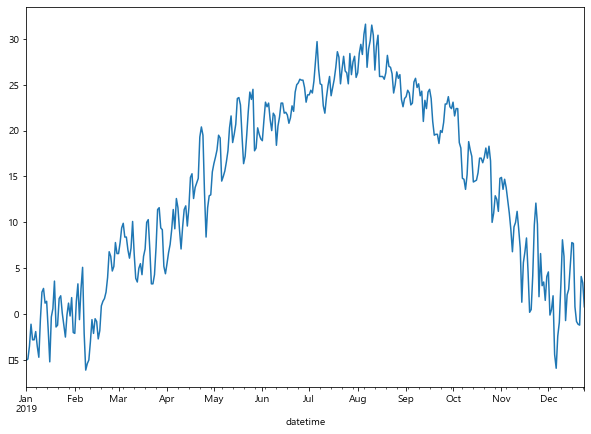

In [746]:
plt.figure(figsize=(10, 7))
tmp_s['temp_avg'].plot()

Malgun Gothic


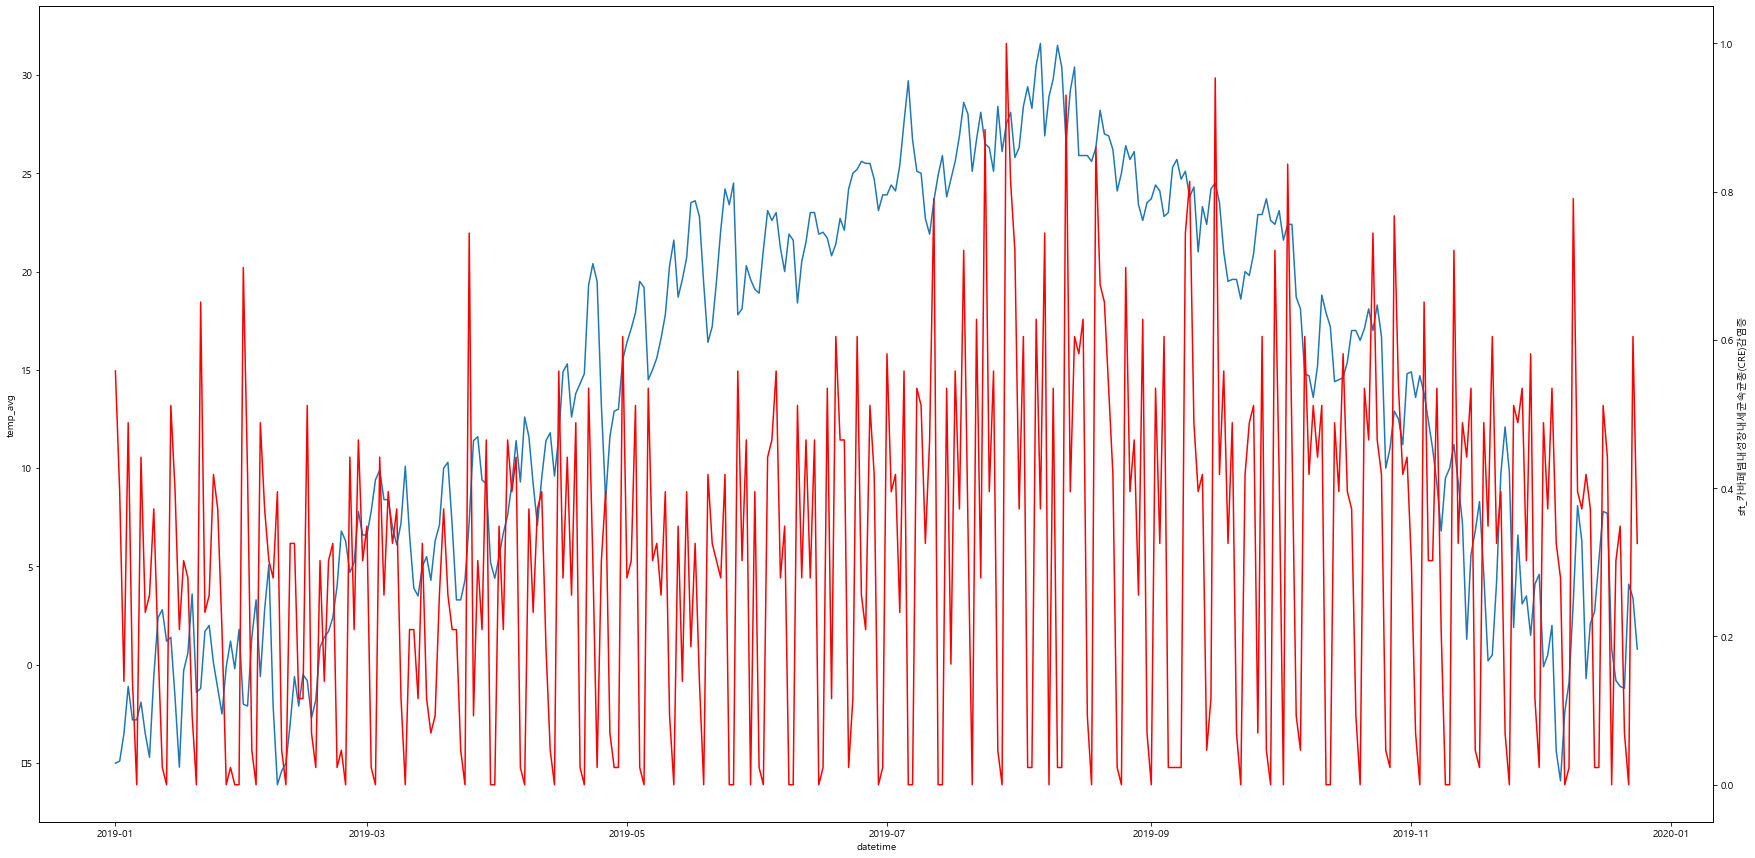

In [749]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "/usr/share/fonts/truetype/malgun.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
print(font_name)

tmp_s = tmp_s.reset_index()
fig, ax = plt.subplots(figsize=(30, 15))
sns.lineplot(x='datetime', y=tmp_s['temp_avg'], data=tmp_s, ax=ax)
ax2 = ax.twinx()
sns.lineplot(x='datetime', y=tmp_s['sft_카바페넴내성장내세균속균종(CRE)감염증'], data=tmp_s, ax=ax2, color='r')
plt.show()
# weatherShop_allP[['dt', 'daylight_hour']].to_csv('./data/daylight_hour.csv')

In [750]:
# 강수량 bining
def get_category(amount_of_rain):
    cat = ''
    if amount_of_rain == 0: cat = 0
    elif amount_of_rain <=1: cat = 1
    elif amount_of_rain <=4: cat = 4
    elif amount_of_rain <=11: cat = 11
    else : cat = 12
    return cat

tmp_s['wf_bin'] = tmp_s['amount_of_rain'].apply(lambda x : get_category(x))

tmp_s.groupby('wf_bin').count()



KeyError: 'amount_of_rain'

In [417]:
# 일조량 범주화
bin_names = [x for x in range(0, 10)]

# bins
count, bin_dividers = np.histogram(tmp_s['daylight_hour'], bins=10)
print(count, bin_dividers) 


tmp_s['dl_bin'] = pd.cut(x=tmp_s['daylight_hour'],     # 데이터 배열
                      bins=bin_dividers,      # 경계 값 리스트
                      labels=bin_names,       # bin 이름
                      include_lowest=True)    # 첫 경계값 포함 


[102  45  49  40  32  90 156  92  68  56] [ 0.    1.36  2.72  4.08  5.44  6.8   8.16  9.52 10.88 12.24 13.6 ]


In [418]:
# 강수량, 일조량 범주별 평균
grouped_wf_bin = tmp_s.groupby('wf_bin')
grouped_dl_bin = tmp_s.groupby('dl_bin')

# grouped.agg('mean') 
grouped_wf_bin_mean = grouped_wf_bin.agg('mean')
grouped_dl_bin_mean = grouped_dl_bin.agg('mean')
display(grouped_wf_bin_mean)
display(grouped_dl_bin_mean)

,temp_avg,temp_min,temp_max,amount_of_rain,wind_vel_max,wind_vel_avg,dewpoint_avg,r_humidity,vapor_pressure_avg,station_pressure_avg,...,Year,pop,denpop,pop_A형간염,pop_C형간염,pop_성홍열,pop_수두,pop_유행성이하선염(볼거리),pop_쯔쯔가무시,pop_카바페넴내성장내세균속균종(CRE)감염증
wf_bin,,,,,,,,,,,,,,,,,,,,,
0,12.345265,7.692235,17.812879,0.000000,4.061742,1.821591,1.714583,51.171402,9.382386,1007.958712,...,2018.505682,9683.255682,15998.602273,0.000502,0.000448,0.000516,0.002969,0.000613,0.000044,0.001169
1,12.968750,9.592187,16.787500,0.487500,4.253125,1.995313,5.987500,64.453125,12.564063,1004.473437,...,2018.421875,9686.859375,16004.468750,0.000452,0.000459,0.000509,0.002912,0.000540,0.000023,0.001205
4,14.456098,11.141463,18.400000,2.392683,4.565854,2.007317,8.517073,69.709756,13.982927,1003.031707,...,2018.634146,9677.731707,15989.609756,0.000494,0.000335,0.000483,0.002454,0.000529,0.000043,0.001023
11,18.122727,15.197727,21.995455,7.079545,4.334091,1.920455,13.034091,74.577273,17.054545,999.513636,...,2018.477273,9684.477273,16000.590909,0.000633,0.000519,0.000439,0.003266,0.000751,0.000080,0.001469
12,18.322642,15.835849,21.552830,32.728302,4.103774,1.690566,15.103774,83.575472,18.922642,999.986792,...,2018.452830,9685.528302,16002.301887,0.000607,0.000540,0.000522,0.002628,0.000736,0.000039,0.001413


,temp_avg,temp_min,temp_max,amount_of_rain,wind_vel_max,wind_vel_avg,dewpoint_avg,r_humidity,vapor_pressure_avg,station_pressure_avg,...,pop,denpop,pop_A형간염,pop_C형간염,pop_성홍열,pop_수두,pop_유행성이하선염(볼거리),pop_쯔쯔가무시,pop_카바페넴내성장내세균속균종(CRE)감염증,wf_bin
dl_bin,,,,,,,,,,,,,,,,,,,,,
0,14.854902,12.256863,17.783333,15.002941,3.896078,1.717647,10.066667,75.499020,15.101961,1003.061765,...,9682.656863,15997.627451,0.000568,0.000449,0.000501,0.002876,0.000665,0.000038,0.001360,7.000000
1,14.584444,11.328889,18.222222,4.035556,3.893333,1.708889,7.855556,66.384444,13.608889,1004.373333,...,9684.933333,16001.333333,0.000510,0.000493,0.000429,0.002770,0.000544,0.000032,0.001193,3.266667
2,12.687755,9.204082,16.918367,3.724490,3.912245,1.742857,5.175510,62.387755,11.389796,1004.167347,...,9677.795918,15989.714286,0.000661,0.000466,0.000466,0.002796,0.000557,0.000027,0.001086,2.938776
3,13.810000,9.992500,18.472500,2.202500,4.365000,1.802500,6.100000,62.120000,11.800000,1005.392500,...,9685.650000,16002.500000,0.000367,0.000389,0.000516,0.002792,0.000506,0.000064,0.000847,1.775000
4,9.334375,5.009375,14.103125,1.328125,4.262500,1.928125,0.915625,57.609375,8.750000,1008.871875,...,9683.500000,15999.000000,0.000443,0.000503,0.000529,0.003343,0.000635,0.000087,0.001330,1.718750
5,12.714444,8.437778,18.175556,0.798889,4.027778,1.756667,3.563333,56.482222,10.350000,1008.018889,...,9683.500000,15999.000000,0.000464,0.000436,0.000526,0.003153,0.000619,0.000062,0.001166,1.088889
6,5.347436,1.100000,10.630769,0.164103,4.306410,2.025641,-5.562821,47.961538,6.407692,1011.901282,...,9685.705128,16002.589744,0.000335,0.000492,0.000563,0.003332,0.000596,0.000052,0.001227,0.294872
7,16.364130,11.447826,22.327174,0.475000,4.000000,1.777174,6.056522,53.658696,11.768478,1006.268478,...,9681.630435,15995.956522,0.000438,0.000421,0.000395,0.002139,0.000511,0.000037,0.001193,0.608696
8,19.952941,14.620588,25.876471,0.039706,4.327941,1.926471,8.122059,49.735294,12.836765,1002.154412,...,9682.867647,15997.970588,0.000671,0.000406,0.000489,0.002390,0.000618,0.000021,0.001139,0.088235


In [419]:
grouped_wf_bin_mean = grouped_wf_bin_mean.reset_index()
grouped_wf_bin_mean['wf_bin'] = grouped_wf_bin_mean['wf_bin'].astype('int')

grouped_dl_bin_mean = grouped_dl_bin_mean.reset_index()
grouped_dl_bin_mean['dl_bin'] = grouped_dl_bin_mean['dl_bin'].astype('int')


In [420]:
# 필요 컬럼만 남김
grouped_wf_bin_mean.columns.tolist()

dropColList = ['temp_min', 'temp_max', 'amount_of_rain', 'wind_vel_max', 'wind_vel_avg', \
               'dewpoint_avg', 'r_humidity', 'vapor_pressure_avg', 'station_pressure_avg', 'sealevel_pressure_avg']

f_grouped_wf_bin_mean = grouped_wf_bin_mean.drop(dropColList, axis=1)
f_grouped_dl_bin_mean = grouped_dl_bin_mean.drop(dropColList, axis=1)


display(f_grouped_wf_bin_mean)
display(f_grouped_dl_bin_mean)

,wf_bin,temp_avg,daylight_hour,A형간염,C형간염,성홍열,수두,유행성이하선염(볼거리),쯔쯔가무시,카바페넴내성장내세균속균종(CRE)감염증,Year,pop,denpop,pop_A형간염,pop_C형간염,pop_성홍열,pop_수두,pop_유행성이하선염(볼거리),pop_쯔쯔가무시,pop_카바페넴내성장내세균속균종(CRE)감염증
0,0,12.345265,8.522538,4.850379,4.340909,5.000000,28.757576,5.935606,0.426136,11.316288,2018.505682,9683.255682,15998.602273,0.000502,0.000448,0.000516,0.002969,0.000613,0.000044,0.001169
1,1,12.968750,4.554688,4.375000,4.453125,4.937500,28.203125,5.234375,0.218750,11.671875,2018.421875,9686.859375,16004.468750,0.000452,0.000459,0.000509,0.002912,0.000540,0.000023,0.001205
2,4,14.456098,3.441463,4.780488,3.243902,4.682927,23.756098,5.121951,0.414634,9.902439,2018.634146,9677.731707,15989.609756,0.000494,0.000335,0.000483,0.002454,0.000529,0.000043,0.001023
3,11,18.122727,3.722727,6.113636,5.022727,4.250000,31.636364,7.272727,0.772727,14.227273,2018.477273,9684.477273,16000.590909,0.000633,0.000519,0.000439,0.003266,0.000751,0.000080,0.001469
4,12,18.322642,1.294340,5.867925,5.226415,5.056604,25.452830,7.132075,0.377358,13.679245,2018.452830,9685.528302,16002.301887,0.000607,0.000540,0.000522,0.002628,0.000736,0.000039,0.001413


,dl_bin,temp_avg,daylight_hour,A형간염,C형간염,성홍열,수두,유행성이하선염(볼거리),쯔쯔가무시,카바페넴내성장내세균속균종(CRE)감염증,...,pop,denpop,pop_A형간염,pop_C형간염,pop_성홍열,pop_수두,pop_유행성이하선염(볼거리),pop_쯔쯔가무시,pop_카바페넴내성장내세균속균종(CRE)감염증,wf_bin
0,0,14.854902,0.313725,5.490196,4.352941,4.852941,27.852941,6.441176,0.372549,13.166667,...,9682.656863,15997.627451,0.000568,0.000449,0.000501,0.002876,0.000665,0.000038,0.001360,7.000000
1,1,14.584444,2.006667,4.933333,4.777778,4.155556,26.822222,5.266667,0.311111,11.555556,...,9684.933333,16001.333333,0.000510,0.000493,0.000429,0.002770,0.000544,0.000032,0.001193,3.266667
2,2,12.687755,3.300000,6.387755,4.510204,4.510204,27.061224,5.387755,0.265306,10.510204,...,9677.795918,15989.714286,0.000661,0.000466,0.000466,0.002796,0.000557,0.000027,0.001086,2.938776
3,3,13.810000,4.837500,3.550000,3.775000,5.000000,27.050000,4.900000,0.625000,8.200000,...,9685.650000,16002.500000,0.000367,0.000389,0.000516,0.002792,0.000506,0.000064,0.000847,1.775000
4,4,9.334375,6.084375,4.281250,4.875000,5.125000,32.375000,6.156250,0.843750,12.875000,...,9683.500000,15999.000000,0.000443,0.000503,0.000529,0.003343,0.000635,0.000087,0.001330,1.718750
5,5,12.714444,7.561111,4.488889,4.222222,5.100000,30.544444,6.000000,0.600000,11.288889,...,9683.500000,15999.000000,0.000464,0.000436,0.000526,0.003153,0.000619,0.000062,0.001166,1.088889
6,6,5.347436,8.860256,3.243590,4.769231,5.455128,32.275641,5.775641,0.506410,11.878205,...,9685.705128,16002.589744,0.000335,0.000492,0.000563,0.003332,0.000596,0.000052,0.001227,0.294872
7,7,16.364130,10.164130,4.239130,4.076087,3.826087,20.706522,4.945652,0.358696,11.543478,...,9681.630435,15995.956522,0.000438,0.000421,0.000395,0.002139,0.000511,0.000037,0.001193,0.608696
8,8,19.952941,11.502941,6.485294,3.926471,4.735294,23.147059,5.985294,0.205882,11.029412,...,9682.867647,15997.970588,0.000671,0.000406,0.000489,0.002390,0.000618,0.000021,0.001139,0.088235
9,9,21.864286,12.726786,8.964286,4.553571,6.285714,34.803571,9.339286,0.232143,12.142857,...,9685.035714,16001.500000,0.000927,0.000470,0.000649,0.003594,0.000964,0.000024,0.001254,0.196429


In [421]:
f_grouped_wf_bin_mean_corr = f_grouped_wf_bin_mean.corr()
f_grouped_dl_bin_mean_corr = f_grouped_dl_bin_mean.corr()

# f_grouped_wf_bin_mean_corr.to_csv("./data/f_grouped_wf_bin_mean_corr.csv")
# f_grouped_dl_bin_mean_corr.to_csv("./data/f_grouped_dl_bin_mean_corr.csv")

In [422]:
dropColList = ['city','temp_min', 'temp_max', 'amount_of_rain', 'wind_vel_max', 'wind_vel_avg', 'daylight_hour', \
               'dewpoint_avg', 'r_humidity', 'vapor_pressure_avg', 'station_pressure_avg', 'sealevel_pressure_avg']
f_weathervsproduct = tmp_s.drop(dropColList, axis = 1)
print(f_weathervsproduct[['dl_bin', 'wf_bin']].groupby('wf_bin').count())
print(f_weathervsproduct[['dl_bin', 'wf_bin']].groupby('dl_bin').count())

        dl_bin
wf_bin        
0          528
1           64
4           41
11          44
12          53
        wf_bin
dl_bin        
0          102
1           45
2           49
3           40
4           32
5           90
6          156
7           92
8           68
9           56


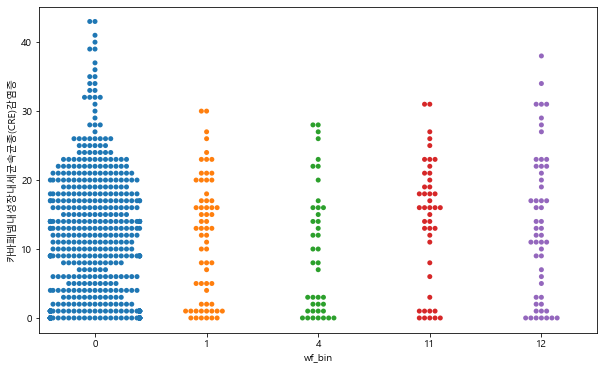

In [426]:
# 강수량에 따른 클릭율 변화
fig, ax = plt.subplots(figsize=(10,6))
sns.swarmplot(x="wf_bin",        #x축 변수
              y="카바페넴내성장내세균속균종(CRE)감염증",        #y축 변수
              data=f_weathervsproduct)      
plt.show()

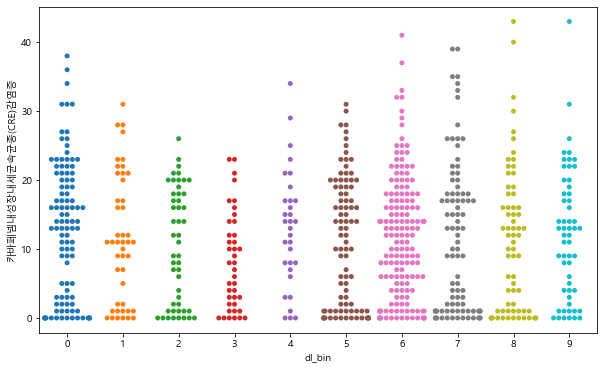

In [427]:
# 일조량에 따른 클릭율 변화
fig, ax = plt.subplots(figsize=(10,6))
sns.swarmplot(x="dl_bin",        #x축 변수
              y="카바페넴내성장내세균속균종(CRE)감염증",        #y축 변수
              data=f_weathervsproduct)      
plt.show()

In [429]:
# import numpy as np
# from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer

# one_hot = LabelBinarizer()
# one_hot.fit_transform(f_weathervsproduct.wf_bin)
# one_hot.classes_

dummy_wf_bin = pd.get_dummies(f_weathervsproduct.wf_bin)
# dummy_wf_bin.columns = ['wf0', 'wf1', 'wf4', 'wf10', 'wf11']
dummy_wf_bin.columns = ['wf0', 'wf1', 'wf4', 'wf10', 'wf11']

dummy_dl_bin = pd.get_dummies(f_weathervsproduct.dl_bin)
dummy_dl_bin.columns = ['dl'+ str(z) for z in range(0,10)]



In [430]:
f_weathervsproduct_d = pd.concat([dummy_wf_bin, dummy_dl_bin, f_weathervsproduct], axis=1)
# f_weathervsproduct_d.loc[:,['wf0', 'wf1', 'wf4', 'wf10', 'wf11', 'wf_bin']]

In [489]:
f_weathervsproduct_d = weekly_trl.reset_index()
f_weathervsproduct_d

,datetime,A형간염,C형간염,성홍열,수두,유행성이하선염(볼거리),쯔쯔가무시,카바페넴내성장내세균속균종(CRE)감염증,daylight_hour,temp_avg,r_humidity
0,2018-01-07,10,37,52,316,29,0,41,7.300000,-2.728571,43.242857
1,2018-01-21,19,73,111,425,48,1,116,5.535714,-1.221429,54.557143
2,2018-02-04,22,81,134,302,60,1,94,7.500000,-7.878571,43.257143
3,2018-02-18,28,54,134,239,55,2,85,7.635714,-3.314286,39.864286
4,2018-03-04,36,51,150,251,58,1,119,6.442857,2.878571,52.821429
5,2018-03-18,30,65,133,218,68,1,120,6.471429,7.728571,59.478571
6,2018-04-01,25,67,134,261,79,2,110,6.478571,10.078571,60.600000
7,2018-04-15,29,77,157,292,120,8,148,5.850000,10.935714,59.085714
8,2018-04-29,27,57,139,352,127,4,132,9.357143,14.407143,48.664286
9,2018-05-13,17,49,136,481,127,5,117,7.335714,16.342857,66.178571


In [752]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

xlist = ['temp_avg']
# xlist = ['wf0', 'wf1', 'wf4', 'wf10', 'wf11', 'temp_avg']
# xlist = ['dl0', 'dl1', 'dl2', 'dl3', 'dl4', 'dl5', 'dl6', 'dl7', 'dl8', 'temp_avg']
X=weekly_trl[xlist]
y=weekly_trl['sft_A형간염']

# A형간염	C형간염	성홍열	수두	유행성이하선염(볼거리)
# 설명 변수 데이터를 정규화(normalization)
# from sklearn import preprocessing
# X = preprocessing.StandardScaler().fit(X).transform(X)

# (1) train, test 구분
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

print('훈련 데이터: ', X_train.shape)
print('검증 데이터: ', X_test.shape)   
 

훈련 데이터:  (36, 1)
검증 데이터:  (16, 1)


In [753]:
# (2) 다중회귀분석 모형
lr = LinearRegression()  
lr.fit(X_train, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
r_square = lr.score(X_test, y_test)
print('결정계수(R-제곱): ', r_square)
# 회귀식의 기울기
print('X 변수의 계수 a: ', lr.coef_)

# 회귀식의 y절편
print('상수항 b: ', lr.intercept_)

결정계수(R-제곱):  0.6899260712362287
X 변수의 계수 a:  [0.08818817]
상수항 b:  0.383802607870795


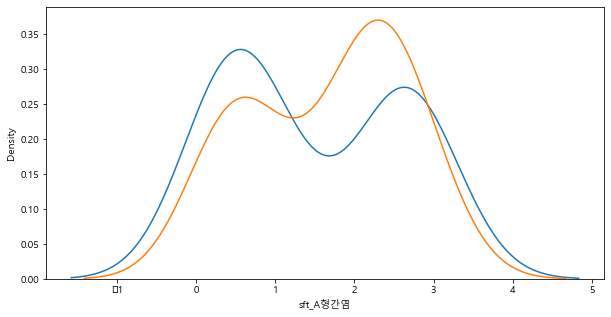

In [754]:
# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력 
y_hat = lr.predict(X_test)

plt.figure(figsize=(10, 5))
ax1 = sns.distplot(y_test, hist=False, label="y_test")
ax2 = sns.distplot(y_hat, hist=False, label="y_hat", ax=ax1)
plt.show()
plt.close()

In [755]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

def runLinearRegression(xlist, data): 
    df = pd.DataFrame()
    ydata = data.drop(xlist + [ 'dl_bin', 'dt_x','Year', 'dt_y'], axis=1)
    print(ydata.columns.tolist())
    for colname in ydata.columns.tolist():

        X=data[xlist]
        y=data[colname]

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

        lr = LinearRegression()  
        lr.fit(X_train, y_train)

        r_square = lr.score(X_test, y_test)
#         print('[' + colname + '])
#         print('[' + colname + ']', '결정계수(R-제곱) :', r_square, '상수항 b: ', lr.intercept_)
#         print('X 변수의 계수 a: ', lr.coef_)
        df = df.append({'productName' : colname , 'R_square' : r_square, 'Xa' : lr.coef_, 'b' : lr.intercept_} , ignore_index=True)
    return df





xlist = ['wf0', 'wf1', 'wf4', 'wf10', 'wf11', 'dl0', 'dl1', 'dl2', 'dl3', 'dl4', 'dl5', 'dl6', 'dl7', 'dl8', 'dl9', 'temp_avg']

allrunLinearRegression = runLinearRegression(xlist, f_weathervsproduct_d)
allrunLinearRegression.to_csv("./data/allrunLinearRegression_dis.csv")


KeyError: "['wf0' 'wf1' 'wf4' 'wf10' 'wf11' 'dl0' 'dl1' 'dl2' 'dl3' 'dl4' 'dl5' 'dl6'\n 'dl7' 'dl8' 'dl9' 'dl_bin' 'dt_x' 'Year' 'dt_y'] not found in axis"

In [439]:
f_weathervsproduct_d.columns.tolist()

['wf0',
 'wf1',
 'wf4',
 'wf10',
 'wf11',
 'dl0',
 'dl1',
 'dl2',
 'dl3',
 'dl4',
 'dl5',
 'dl6',
 'dl7',
 'dl8',
 'dl9',
 'dt_x',
 'temp_avg',
 'A형간염',
 'C형간염',
 '성홍열',
 '수두',
 '유행성이하선염(볼거리)',
 '쯔쯔가무시',
 '카바페넴내성장내세균속균종(CRE)감염증',
 'Year',
 'dt_y',
 'pop',
 'denpop',
 'pop_A형간염',
 'pop_C형간염',
 'pop_성홍열',
 'pop_수두',
 'pop_유행성이하선염(볼거리)',
 'pop_쯔쯔가무시',
 'pop_카바페넴내성장내세균속균종(CRE)감염증',
 'dl_bin',
 'wf_bin']

In [65]:
print(allrunLinearRegression.Xa[0][1])

1.1132437065793717


SVR()
결정계수(R-제곱):  0.827976270567556
SGDRegressor()
결정계수(R-제곱):  0.4251914443220207
BayesianRidge()
결정계수(R-제곱):  0.7872475597100136
LassoLars()
결정계수(R-제곱):  0.33742670403299435
ARDRegression()
결정계수(R-제곱):  0.7858745052942466
PassiveAggressiveRegressor()
결정계수(R-제곱):  0.04279333532937779
TheilSenRegressor(max_subpopulation=10000)
결정계수(R-제곱):  0.7814937090054836
LinearRegression()
결정계수(R-제곱):  0.7807670877080275


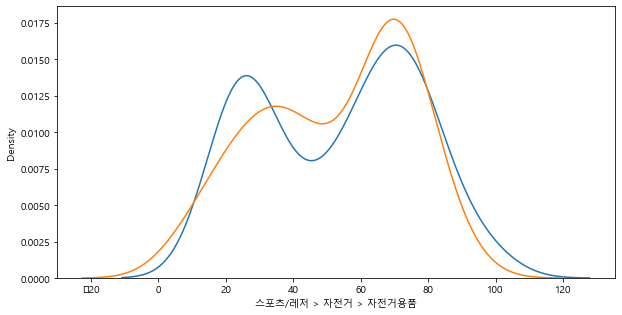

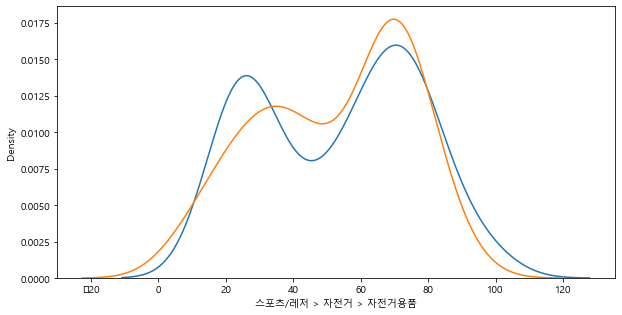

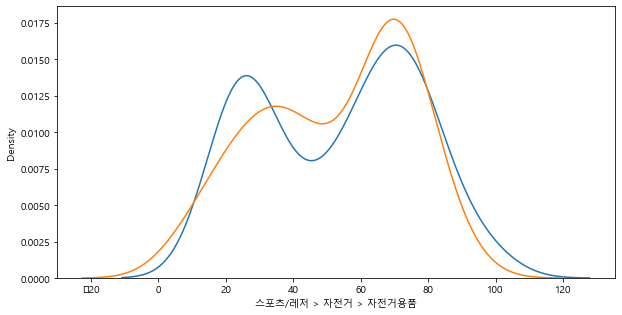

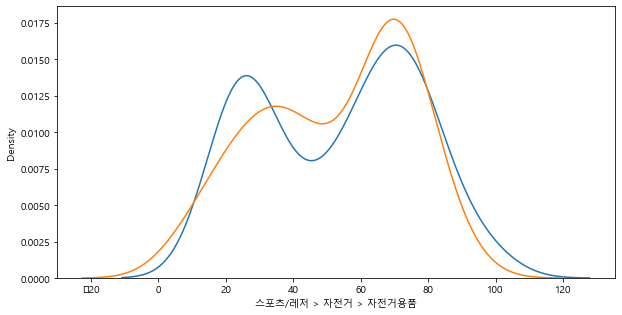

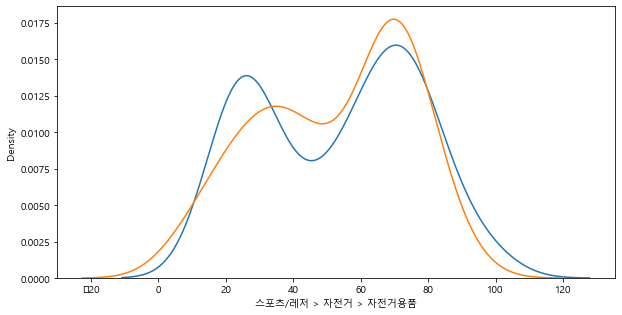

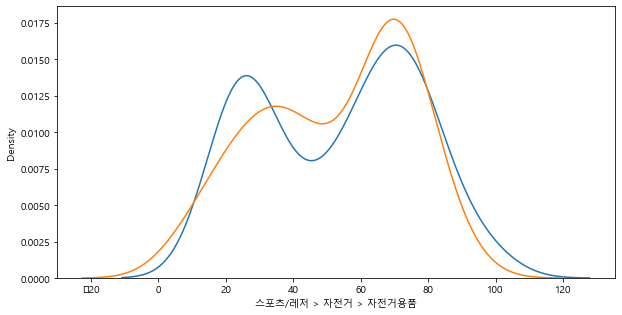

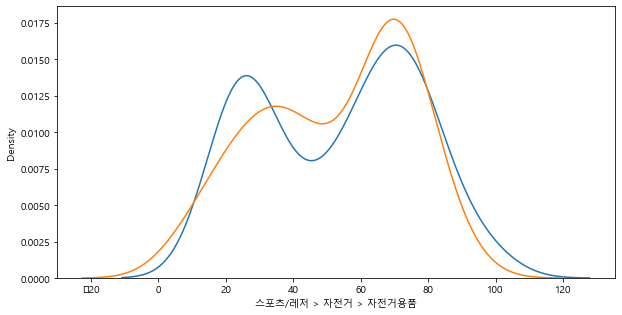

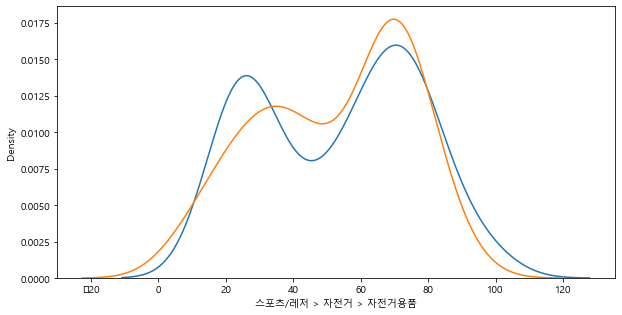

In [66]:
import numpy as np
from sklearn import linear_model
from sklearn import svm

classifiers = [
    svm.SVR(),
    linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor(),
    linear_model.LinearRegression()]

trainingData    = X_train
trainingScores  = y_train
predictionData  = X_test

for item in classifiers:
    print(item)
    clf = item
    clf.fit(trainingData, trainingScores)
    # print(clf.predict(predictionData),'\n')
    r_square = clf.score(X_test, y_test)
    print('결정계수(R-제곱): ', r_square)
    
    y_hat = lr.predict(X_test)

    plt.figure(figsize=(10, 5))
    ax1 = sns.distplot(y_test, hist=False, label="y_test")
    ax2 = sns.distplot(y_hat, hist=False, label="y_hat", ax=ax1)
plt.show()
plt.close()    